# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [5]:
# Create Pivot Table from df_transactions using the customer name as the index and making sure that the Na's are not dropped out
offers_transactions=df_offers.merge(df_transactions, on='offer_id')
ot=offers_transactions.pivot_table(index='customer_name', values='n', columns='offer_id')

# Fill Na values with 0 and reset the index
x=ot.fillna(value=0).reset_index()
x

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

I believe that smaller values of SS represent better clusterings because this means that each observation is very close to the mean of the cluster. However, the SS value cannot be 0 because an SS of 0 indicates that each observation is its own cluster.

In [6]:
# your turn
# Specify the offer id columns for the matrix
offerid=x.ix[:, 1:]

# Create the matrix
xcols=offerid.values
xcols

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.]])

In [32]:
from sklearn.cluster import KMeans

# Specify k-range
k_range=range(2,11)

# Define sum of squares function for k's within the range and fit kmeans model on the numpy matrix
#Inertia: Sum of distances of samples to their closest cluster center (within-cluster sum-of-squares)
def ss(k):
    kmeans=KMeans(n_clusters=k).fit(xcols)
    return kmeans.inertia_

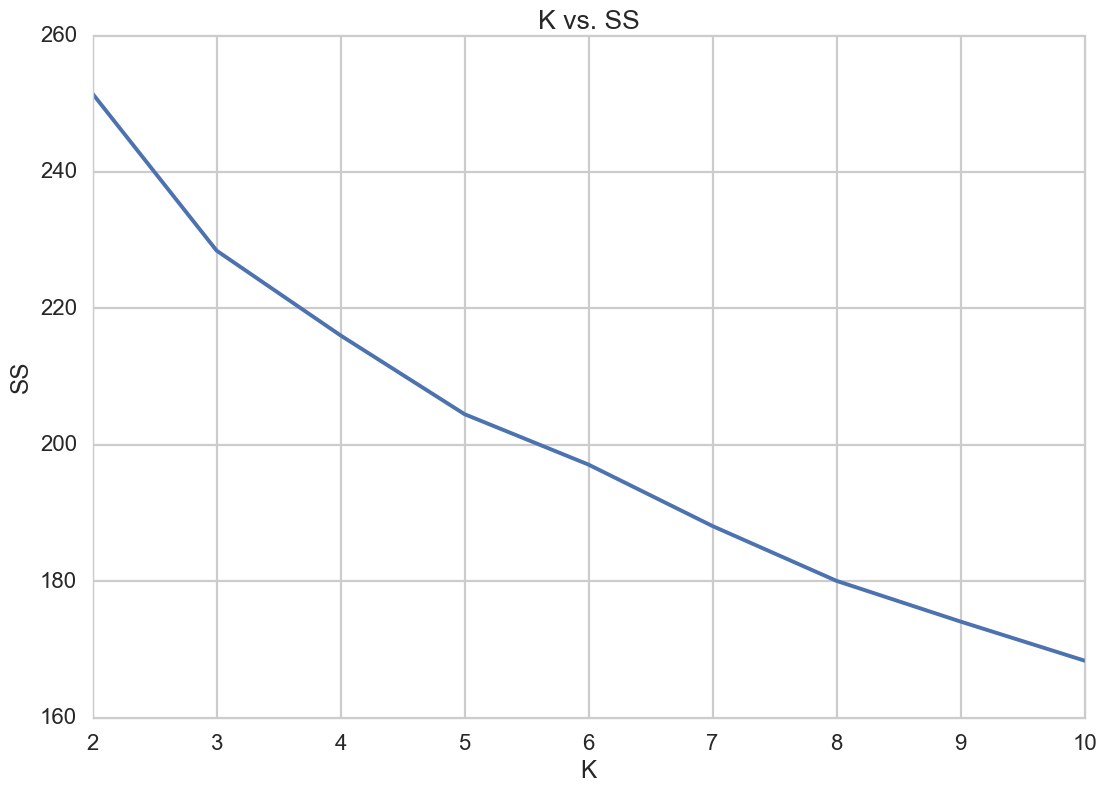

In [33]:
# Calculate the sum of squares for all the k's within the range
ss=[ss(k) for k in k_range]

# Plot k's vs. SS
plt.plot(k_range, ss)
plt.title('K vs. SS')
plt.xlabel('K')
plt.ylabel('SS')

It is difficult to choose a k from this plot because the "elbow" is not clear, and the SS steadily decreases as k increases. Thus, based off of the graph and the range of k defined in the problem, I would choose k=10 as the best value. However, to test the absolute best value of k with the elbow method, I would test a larger range for k until a clear plateau is visible in the graph. 

I think that this is the biggest challenge when using the elbow method to find k - if the data is not very well clustered, then the k vs. ss plot can be quite smooth with no clear elbow.

In [9]:
# Use fit_predict to predict the cluster centers and the indexes when k=10
kmeans=KMeans(n_clusters=10).fit_predict(xcols)

# Create a dataframe for the observations - one column with the label of the cluster the observation belongs to and
# one with a unique identifier number for each observation
cl=pd.DataFrame(kmeans, columns=['label'])
cl['Number']=range(0,100)

#Group by cluster label and count the number of observations per label
count=cl.groupby('label').count()
count

,Number
label,
0,6
1,17
2,15
3,20
4,7
5,10
6,4
7,10
8,9


## Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

# <pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 12 The average silhouette_score is : 0.134799711943
For n_clusters = 13 The average silhouette_score is : 0.142443581069
For n_clusters = 14 The average silhouette_score is : 0.110095566814
For n_clusters = 15 The average silhouette_score is : 0.131521040588
For n_clusters = 16 The average silhouette_score is : 0.12504244851


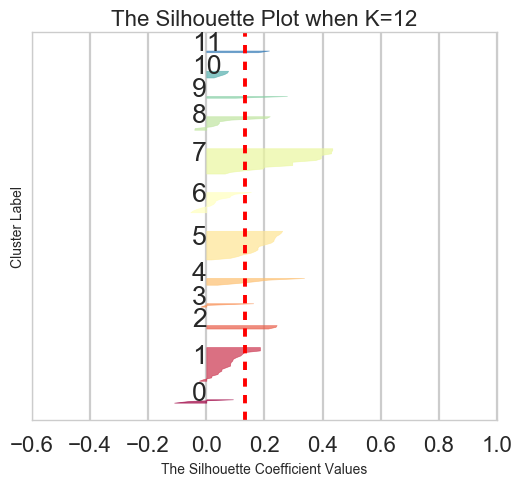

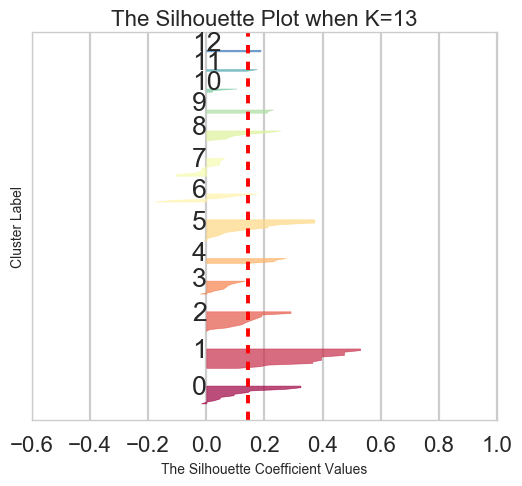

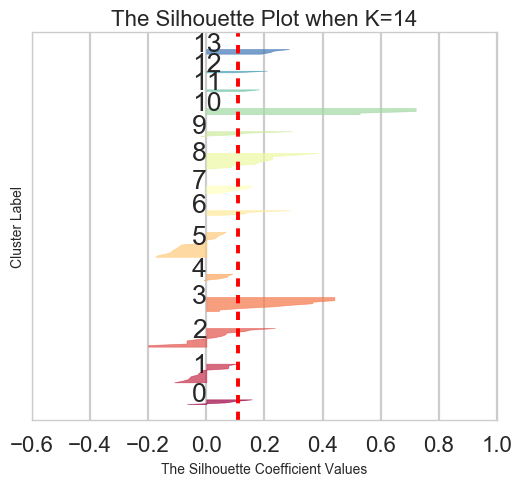

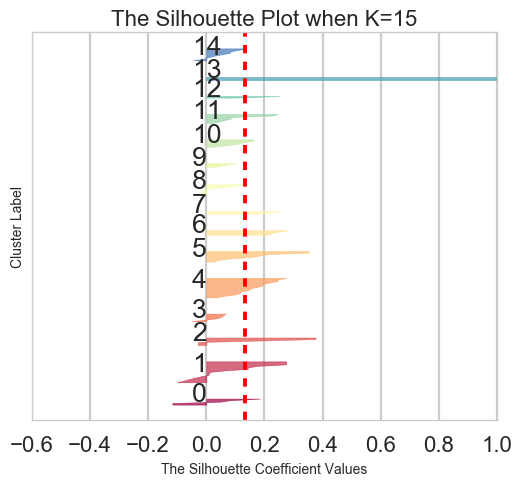

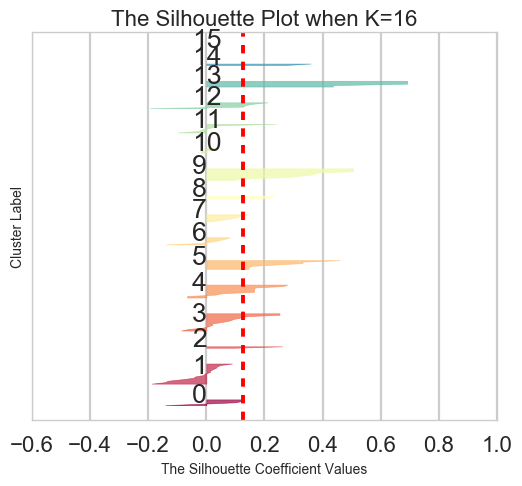

In [10]:
from sklearn.metrics import silhouette_score

# Specify the values of K to be tested with silhouette scores
range_n_clusters = [12, 13, 14, 15, 16]

for n_clusters in range_n_clusters:
    f, ax=plt.subplots()
    f.set_size_inches(6, 5)
    plt.subplots_adjust()
    
    # Set x axis as the Silhouette coefficient values (between -1 and 1)
    ax.set_xlim([-.6, 1])
    
    # Add space between each silhouette plot of each individual cluster
    ax.set_ylim([0, len(xcols) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)  
    cluster_labels = clusterer.fit_predict(xcols)

    # Calculate the average silhouette scores for the K's specified in the K range
    silhouette_avg = silhouette_score(xcols, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    #Compute  the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(xcols, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.get_cmap('Spectral')(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The Silhouette Plot when K=%d" % n_clusters, fontsize=16)
    ax.set_xlabel("The Silhouette Coefficient Values", fontsize=10)
    ax.set_ylabel("Cluster Label", fontsize=10)
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

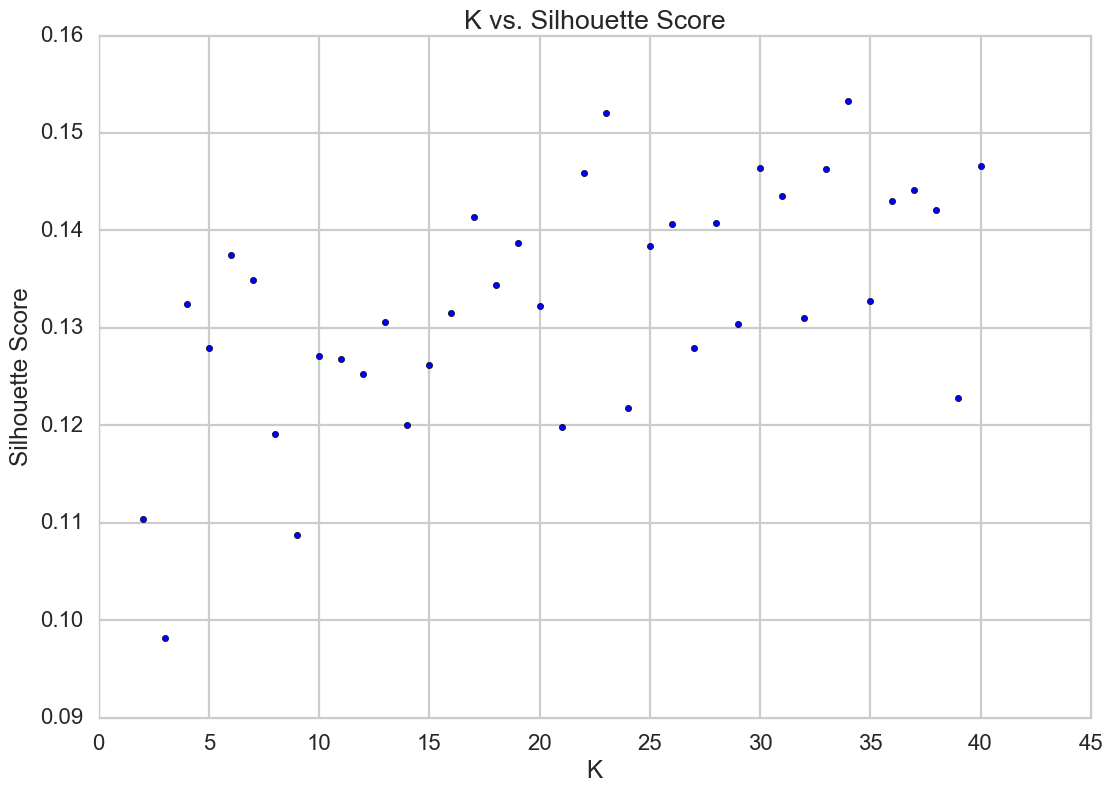

In [11]:
# Specify K range (I made the range larger to investigate possible better values of K)
k_range=range(2,41)

# Fit K means algorithim for all the specified values of K
for k in k_range:
    cluster=KMeans(n_clusters=k)
    cluster_l=cluster.fit_predict(xcols)

# Calculate the silhouette scores for all K in K range and plot
    sil_avg=silhouette_score(xcols, cluster_l)
    plt.scatter(k, sil_avg)
    plt.xlabel('K')
    plt.ylabel('Silhouette Score')
    plt.title('K vs. Silhouette Score')


When we were using the Elbow method, there was no clear elbow so I chose K=10 because the sum-of-squares was the lowest at this level of K, given the K range assigned in the problem. However, as I mentioned, the K vs. SS graph showed that the sum of squares seemed to be steadily decreasing as K increased, past K=10. 

Using the Silhouette Method, it is evident that none of the K values in the range that I chose are good picks based off of the table above. All of the values I chose for K have silhouette scores smaller than 0.25, suggesting no reasonble structure exists when 2$\leq$K$\leq$40. However, according to the scatter plot, there are several values for K that have slightly better Silhouette scores than when K=10, e.g. 30$\leq$K$\leq$40.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [12]:
# Create Cluster labels w/ K=10
k_means=KMeans(n_clusters=10, random_state=10)
cluster_labels=k_means.fit_predict(xcols)
cluster_labels

array([1, 2, 0, 1, 3, 3, 0, 9, 8, 1, 4, 0, 1, 2, 2, 0, 2, 0, 1, 8, 1, 9, 8,
       4, 0, 5, 5, 2, 3, 0, 1, 6, 8, 7, 1, 6, 8, 1, 8, 6, 0, 0, 9, 3, 1, 7,
       1, 1, 2, 2, 2, 5, 0, 0, 3, 9, 0, 1, 6, 3, 3, 9, 2, 6, 9, 0, 0, 2, 4,
       2, 5, 5, 8, 1, 3, 1, 0, 8, 6, 0, 8, 2, 5, 0, 9, 6, 1, 2, 2, 9, 7, 1,
       2, 1, 8, 3, 9, 3, 7, 3], dtype=int32)

In [13]:
# Use PCA to reduce dimensionality of data to 2 components
pca=sklearn.decomposition.PCA(n_components=2)
xy=pca.fit_transform(xcols)
x_y=pd.DataFrame(xy)
x_y.columns=['x', 'y']
x_y

,x,y
0,1.007580,0.108215
1,-0.287539,0.044715
2,-0.392032,1.038391
3,0.699477,-0.022542
4,0.088183,-0.471695
5,-0.485282,-0.725503
6,-0.591941,1.506500
7,0.661732,0.090308
8,-0.118943,-0.577499
9,1.079827,-0.007488


In [14]:
# Create dataframe with customer name and cluster labels
names_labels=pd.DataFrame(x['customer_name'])
names_labels['label']=cluster_labels
names_labels

#Add PCA columns x, y
names_labels['x']=x_y['x']
names_labels['y']=x_y['y']
names_labels

,customer_name,label,x,y
0,Adams,1,1.007580,0.108215
1,Allen,2,-0.287539,0.044715
2,Anderson,0,-0.392032,1.038391
3,Bailey,1,0.699477,-0.022542
4,Baker,3,0.088183,-0.471695
5,Barnes,3,-0.485282,-0.725503
6,Bell,0,-0.591941,1.506500
7,Bennett,9,0.661732,0.090308
8,Brooks,8,-0.118943,-0.577499
9,Brown,1,1.079827,-0.007488


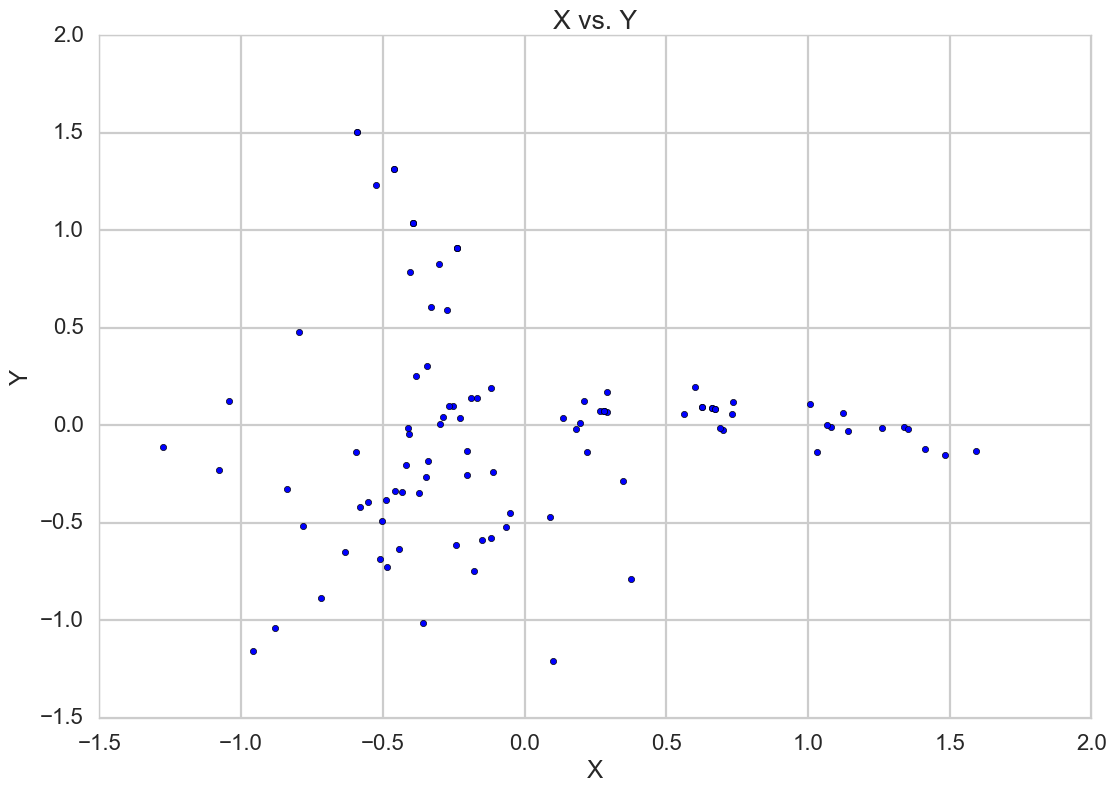

In [15]:
# Plot X vs Y
plt.scatter(names_labels.x, names_labels.y)
plt.title('X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')


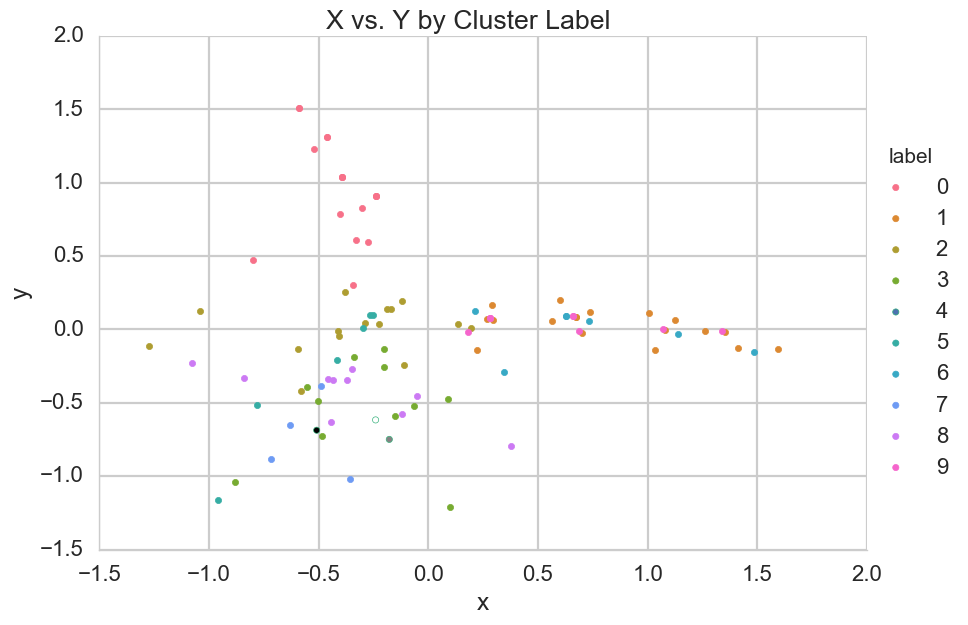

In [16]:
# Use seaborn to assign different colors for different clusters (K=10)
import seaborn
fg = seaborn.FacetGrid(data=names_labels, hue='label', aspect=1.4, size=6.5)
xvy=fg.map(plt.scatter, 'x', 'y').add_legend().fig.suptitle('X vs. Y by Cluster Label')

The clusters do not look good, which I am not surprised by because all of the values I chose for K had very low silhouette scores. This could be due to an error in my work or simply because this data is not structured in a way that is optimal for clustering. Based off what I see, the best value would be K=39, but that still has a very low silhouette score. I think that the Silhouette Score vs. K scatterplot method was the best for visually choosing K in this particular exercise.

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [17]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca=pca.fit(xcols)
explained_var=pca.explained_variance_ 
explained_var

array([ 0.40555241,  0.30446016,  0.20026967,  0.1653668 ,  0.14865096,
        0.14200293,  0.13680698,  0.12070372,  0.1151981 ,  0.10696228,
        0.09838435,  0.09401002,  0.08603449,  0.07184171,  0.06543861,
        0.06183019,  0.05578045,  0.05274121,  0.04681513,  0.04349972,
        0.03861419,  0.03589526,  0.03421157,  0.0320274 ,  0.02911226,
        0.02592039,  0.02285085,  0.02121206,  0.01862586,  0.01635995,
        0.01411925,  0.00770111])

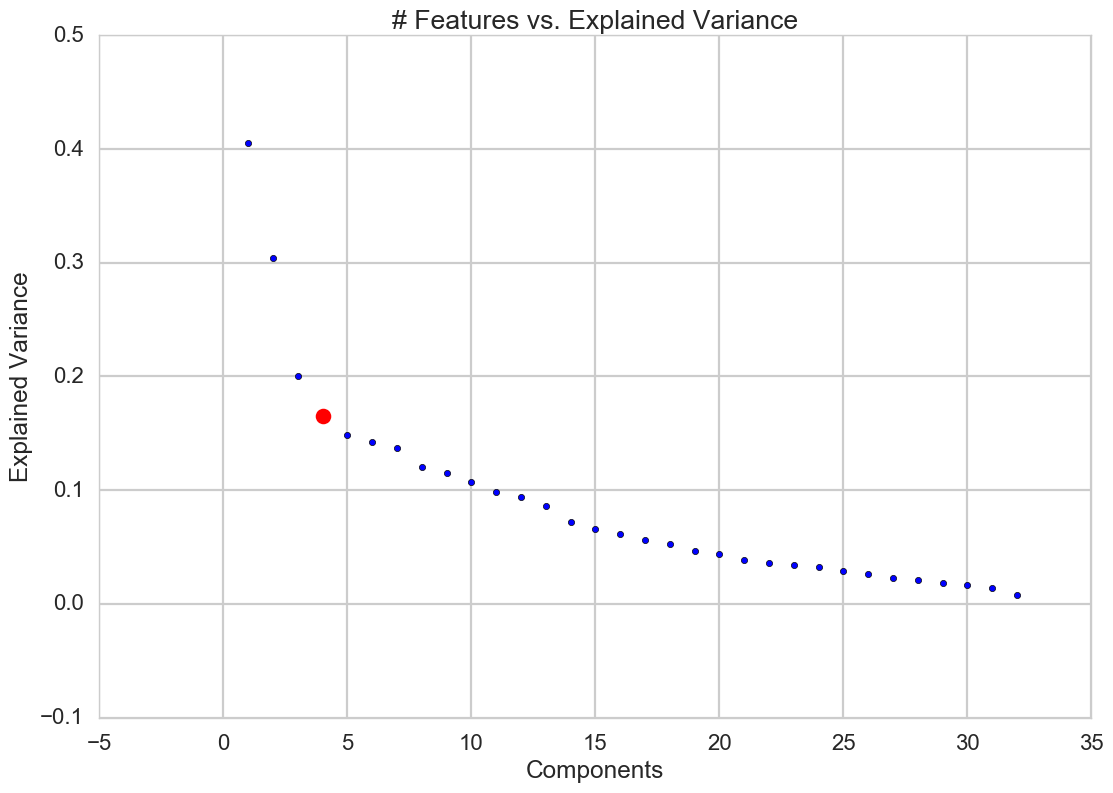

In [18]:
# Plot # of features vs. explained variance
components=range(1,33)
plt.scatter(components, explained_var)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.title('# Features vs. Explained Variance')

# Highlight the "elbow" in red
plt.plot((4), (0.1653668), 'o', color='r')

According to the graph, one optimal number of dimensions is 4.

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


#### 1. Affinity Propagation 

In [19]:
# Specify potential values for d (damping)
d_range=[0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate silhouette score w/ affinity propagration algorithim and different values of d
def calc_sil(d):
    afp=sklearn.cluster.AffinityPropagation(damping=d).fit_predict(xcols)
    return(silhouette_score(xcols, afp))

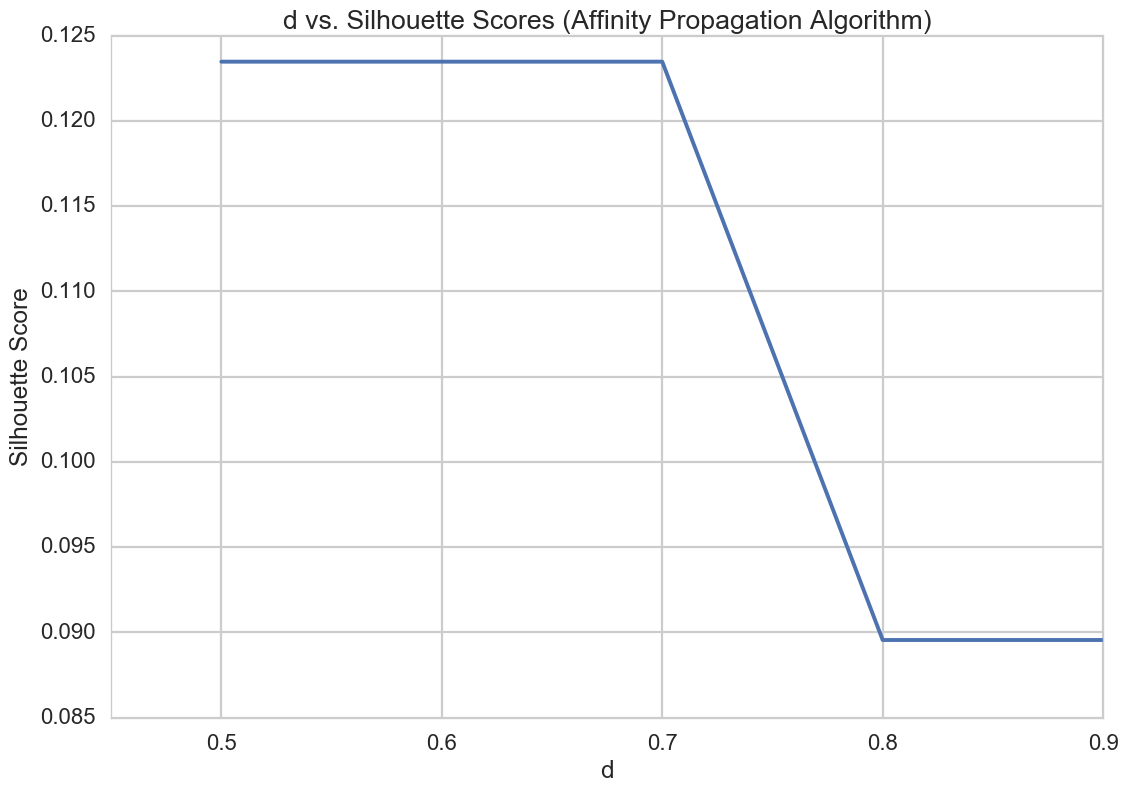

In [20]:
# Plot Silhouette scores vs. different values of d in the affinity propagation algorithm
plt.plot(d_range, [calc_sil(d) for d in d_range])
plt.title('d vs. Silhouette Scores (Affinity Propagation Algorithm)')
plt.xlabel('d')
plt.ylabel('Silhouette Score')

#### 2. Spectral Clustering 

In [21]:
# Specify potential values for n_clusters
n_range=range(2,20)

# Calculate silhouette score w/ spectral clustering algorithim and different values of n
def calc_sil(n):
    spc=sklearn.cluster.SpectralClustering(n_clusters=n).fit_predict(xcols)
    return(silhouette_score(xcols, spc))

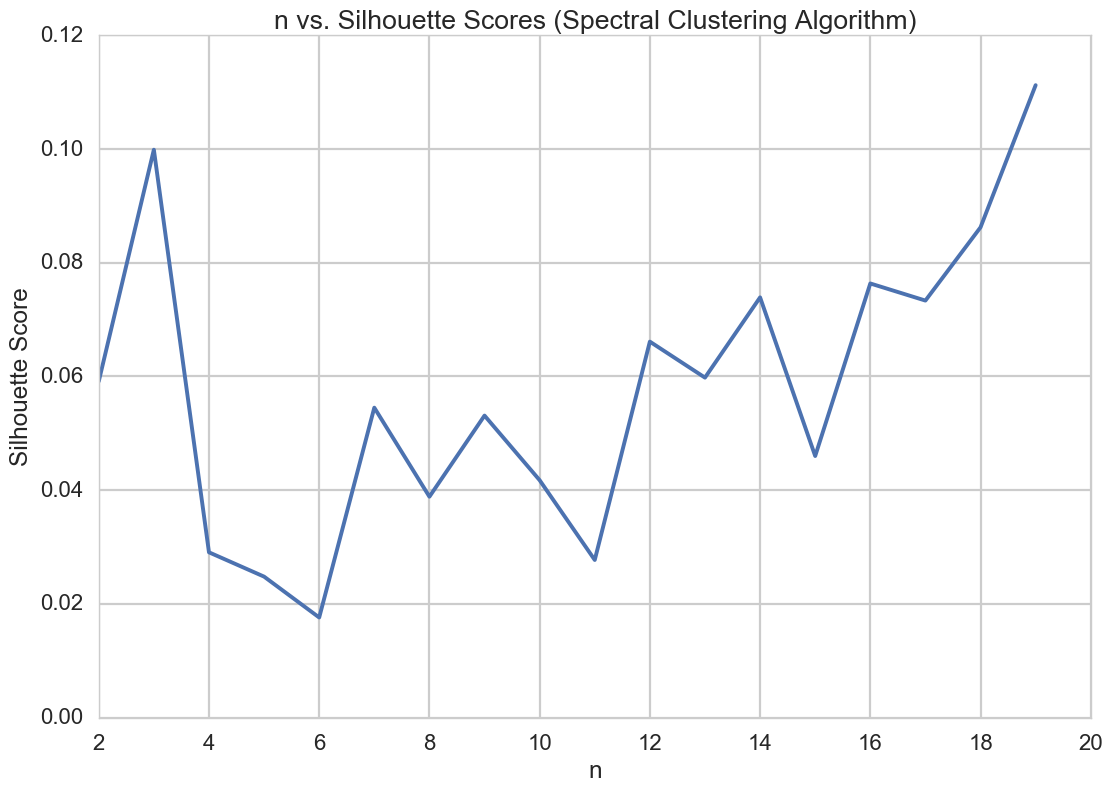

In [22]:
# Plot Silhouette scores vs. different values of n in the spectral clustering algorithm
plt.plot(n_range, [calc_sil(n) for n in n_range])
plt.title('n vs. Silhouette Scores (Spectral Clustering Algorithm)')
plt.xlabel('n')
plt.ylabel('Silhouette Score')

#### 3. Agglomerative Clustering

In [23]:
# Specify potential values for n_clusters
N_range=range(2,20)

# Calculate silhouette score w/ agglomerative clustering algorithim and different values of n
def calc_sil(N):
    agc=sklearn.cluster.AgglomerativeClustering(n_clusters=N).fit_predict(xcols)
    return(silhouette_score(xcols, agc))

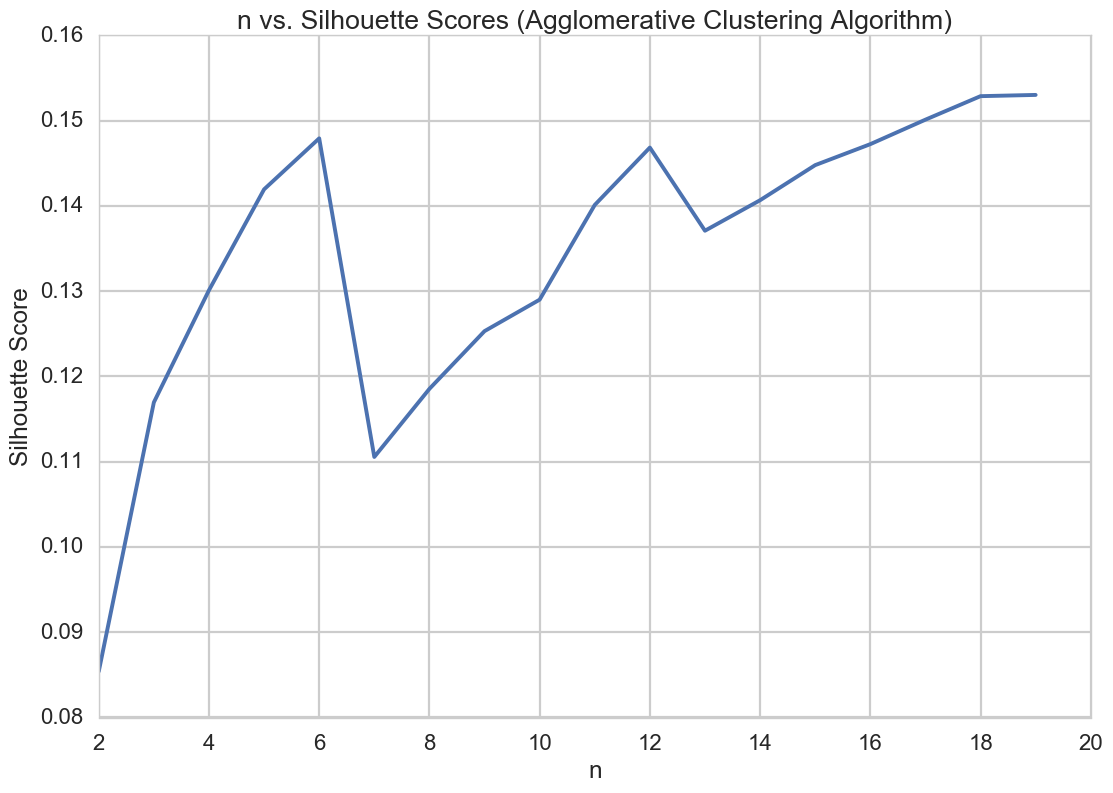

In [24]:
# Plot Silhouette scores vs. different values of n in the spectral clustering algorithm
plt.plot(n_range, [calc_sil(N) for N in N_range])
plt.title('n vs. Silhouette Scores (Agglomerative Clustering Algorithm)')
plt.xlabel('n')
plt.ylabel('Silhouette Score')

#### 4. DBSCAN

In [25]:
# Specify potential values for eps (The maximum distance between 
# two samples for them to be considered as in the same neighborhood -- float)

e_range=[1.6, 1.8, 2, 2.2]

# Calculate silhouette score w/ agglomerative clustering algorithim and different values of n
def calc_sil(e):
    dbs=sklearn.cluster.DBSCAN(eps=e).fit_predict(xcols)
    return silhouette_score(xcols, dbs)

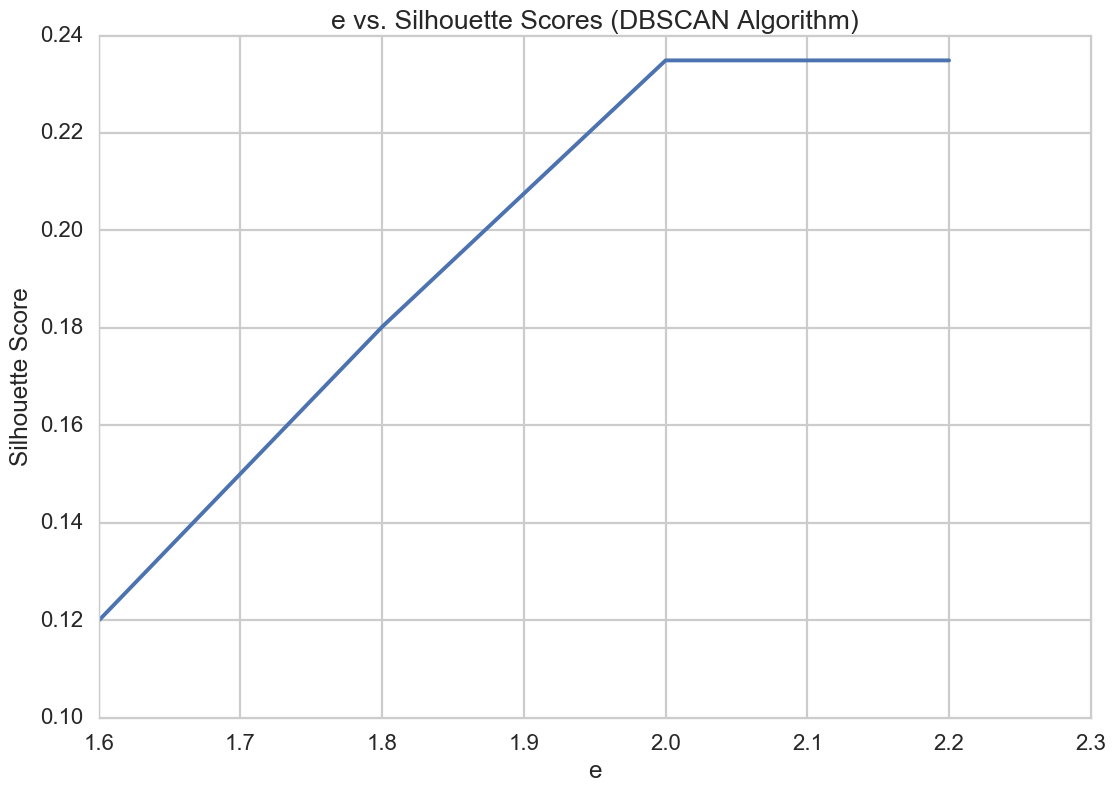

In [26]:
# Plot Silhouette scores vs. different values of e in the DBSCAN algorithm
plt.plot(e_range, [calc_sil(e) for e in e_range])
plt.title('e vs. Silhouette Scores (DBSCAN Algorithm)')
plt.xlabel('e')
plt.ylabel('Silhouette Score')

By using the silhouette score to measure the clustering algorithms, I found that best one is the DBSCAN method (high silhouette score of ~.24) and the worst is the Spectral Clustering method (high silhouette score of ~.11). 

One reason I think that the DBSCAN method works best is that it used in cases in which there are uneven cluster sizes. As you can see in the graph of the data points below, if one were to estimate the clusters in the data simply by eyeballing, there appears to be one cluster where X is between -0.5 and 0 that is larger than the others. Additionally, DBSCAN measures the distances between nearest points. Because my data is not very spread out, it makes sense that the best clustering method would try to minimize the distance between closest neighbors and maximize the distance between farthest neighbors.

It makes sense that Spectral Clustering performed the worst because it is typically used when the number of clusters is small. By looking at my data below, it is quite intuitive to estimate that this data should have 7-10 clusters, which is certainly more than a few. 

While I am not sure why Affinity Propagation and Agglomerative Clustering did not work on the data as well, my speculation is that this has something to do with the distance metrics that are used for both (graph-distance and pairwise distances, respectively).

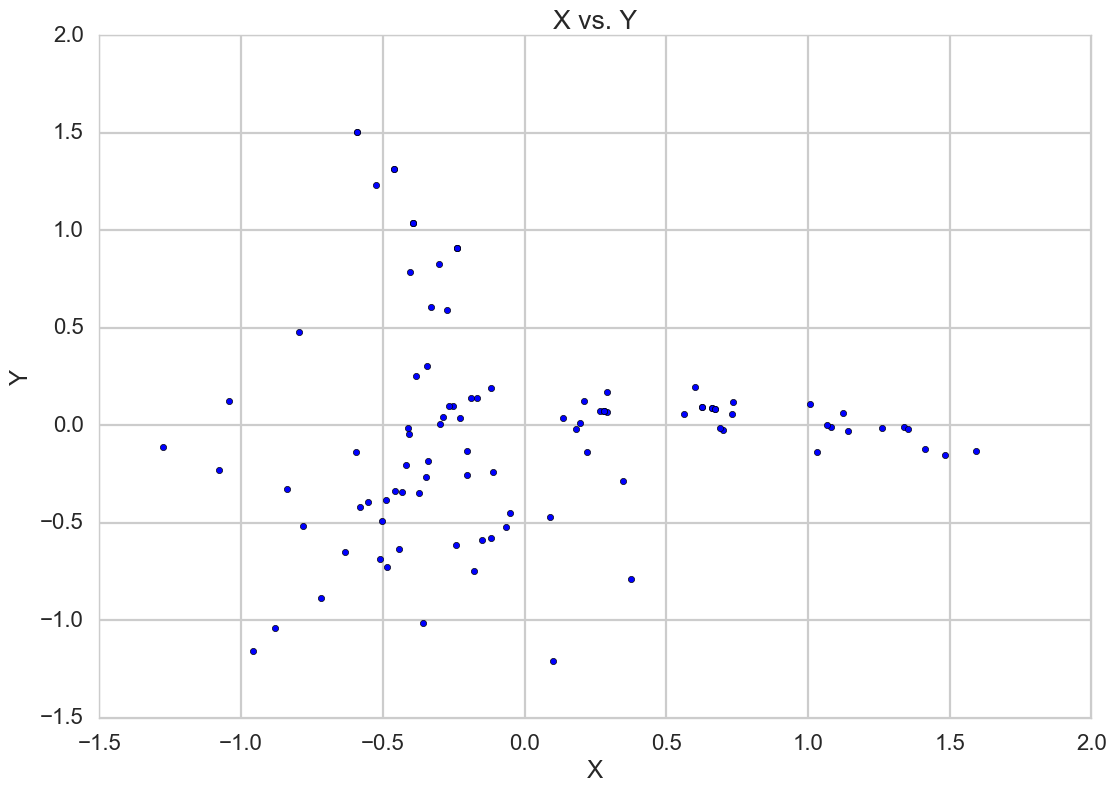

In [27]:
plt.scatter(names_labels.x, names_labels.y)
plt.title('X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')